In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import imutils

In [31]:
# image = cv2.imread('./arisu_mia.JPG')
image = cv2.imread('./business_card.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height=500)  # resize image to have a height of 500px

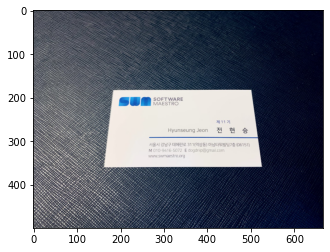

In [32]:
plt.imshow(image)
plt.show()

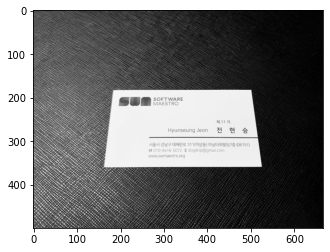

In [38]:
# Convert RGB image to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')  # cmap must be specified
plt.show()

In [39]:
gray = cv2.GaussianBlur(gray, (9, 9), 0)  # Gaussian Blur for removing high frequency noise
edged = cv2.Canny(gray, 75, 200)  # Canny edge detection alg.

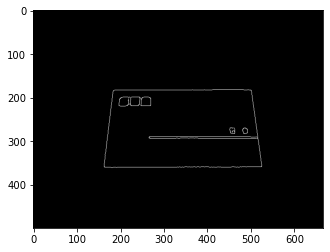

In [40]:
plt.imshow(edged, cmap='gray')
plt.show()

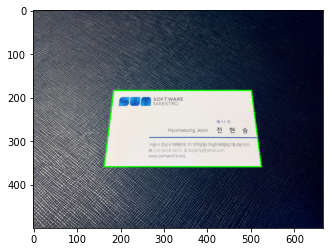

In [41]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)  # Find the contours in the edged image.
cnts = imutils.grab_contours(cnts)  # OpenCV 2.4, OpenCV 3, OpenCV 4 return contours differently. Cover it with imutils.
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)

    if len(approx) == 4:
        screenCnt = approx
        break

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)